In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ipl = pd.read_csv("data.csv")

In [3]:
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
ipl.shape

(76014, 15)

In [5]:
#Removing not important columns
ipl.drop(['mid','venue','batsman','bowler','striker','non-striker'], axis = 1, inplace = True)

In [6]:
ipl.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
ipl['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
#Taking only  teams who currently playing
currentteams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
#Filtering currently playign teams from bating and bowling teams
ipl = ipl[(ipl['bat_team'].isin(currentteams)) & (ipl['bowl_team'].isin(currentteams))]

In [10]:
#Taking overs above 5 to get prediction
ipl = ipl[ipl['overs'] >= 5.0]

In [11]:
ipl.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,18-04-08,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


#Current teams after removing the not existing teams

In [12]:
ipl['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [13]:
ipl['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [14]:
#Importing datatime lib for convering date string into datetime object 
from datetime import datetime
ipl['date'] = pd.to_datetime(ipl['date'])

In [15]:
#Convert categorical variable into dummy/indicator variables.
converted_ipl = pd.get_dummies(data = ipl, columns = ['bat_team','bowl_team'])

In [16]:
converted_ipl.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Splitting of data into train and test set

In [17]:
x_train = converted_ipl.drop(labels='total', axis=1)[converted_ipl['date'].dt.year <= 2016]
x_test = converted_ipl.drop(labels='total', axis=1)[converted_ipl['date'].dt.year >= 2017]
y_train = converted_ipl[converted_ipl['date'].dt.year <= 2016]['total'].values
y_test = converted_ipl[converted_ipl['date'].dt.year >= 2017]['total'].values

In [18]:
#Removing date columns becoz its not used further
x_train.drop(labels = 'date', axis = 1, inplace = True)
x_test.drop(labels = 'date', axis = 1, inplace = True)

# Model Building

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

Creating Pickle for LR Model

In [21]:
import pickle
Score_LR = 'Scroe_LR.pkl'
pickle.dump(LR, open(Score_LR,'wb'))

# Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
RR = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(RR,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.89586e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50306e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.58475e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54634e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55239e-18): result may not be accurate.
  r

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

# Score Predictions

In [24]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 40}
-328.4152792487923


In [25]:
prediction = ridge_regressor.predict(x_test)

<AxesSubplot:>

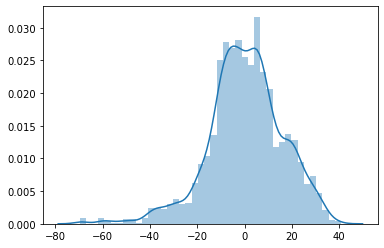

In [26]:
import seaborn as sb
sb.distplot(y_test - prediction)

# Evaluation of Model using MSE, MAE and RMSE

In [27]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.11729452700503
MSE: 251.0317296411268
RMSE: 15.84398086470464


In [28]:
Score_RR = 'Scroe_RR.pkl'
pickle.dump(LR, open(Score_RR,'wb'))

# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
RFPrediction = RF.predict(x_test)

In [32]:
RFPrediction

array([185.19, 186.86, 189.11, ..., 117.58, 114.77, 114.33])

Evaluation of Model using MSE, MAE and RMSE

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, RFPrediction))
print('MSE:', metrics.mean_squared_error(y_test, RFPrediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RFPrediction)))

MAE: 13.757047936165108
MSE: 335.1080797308715
RMSE: 18.305957492872956


# Random Forest Regresssion is generating more error than Ridge Regression we got good predictions withthe Ridge Regression Model which fits model perfectly